# Univariate Regression

## Formula
$$
y = \theta_0 + \theta_1 x
$$

Where:
- $y$ is the target variable.
- $x$ is the single feature.
- $\theta_0$ is the intercept.
- $\theta_1$ is the coefficient (slope) for the feature.

## Description
Univariate regression uses one feature $x$ to predict a target variable $y$. It models a simple linear relationship between the feature and the target. The model aims to learn the value of $\theta_1$ (the slope) and $\theta_0$ (the intercept) to fit a line to the data points in a way that minimizes the error between predicted and actual values.


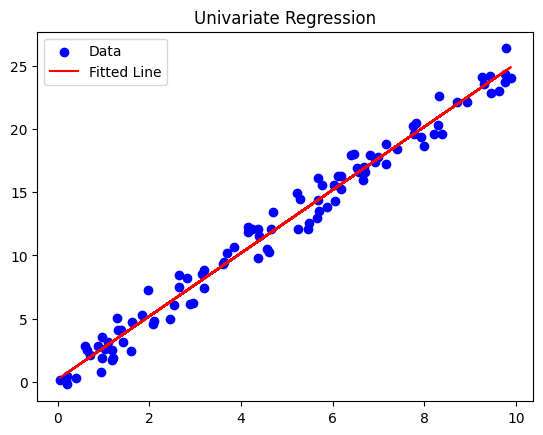

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate simple linear data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2.5 * X.squeeze() + np.random.randn(100)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Plot the data and the line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')
plt.title("Univariate Regression")
plt.legend()
plt.show()

# Multivariate Regression

## Formula
$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n
$$

Where:
- $y$ is the target variable.
- $x_1, x_2, \ldots, x_n$ are the features (independent variables).
- $\theta_0$ is the intercept.
- $\theta_1, \theta_2, \ldots, \theta_n$ are the coefficients for each feature.

## Description
Multivariate regression models the relationship between a target variable $y$ and multiple features (independent variables) $x_1, x_2, \ldots, x_n$. Each feature has an associated coefficient $\theta$. The model predicts $y$ by learning the values of the coefficients for each feature, capturing the influence of all features on the target variable simultaneously.


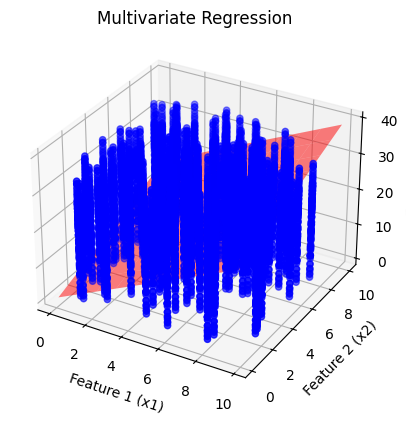

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate multivariate data
np.random.seed(0)
X1 = np.random.rand(100, 1) * 10
X2 = np.random.rand(100, 1) * 10
y = 2.5 * X1.squeeze() + 1.5 * X2.squeeze() + np.random.randn(100) * 2

# Combine features into a single dataset
X = np.hstack([X1, X2])

# Fit the multivariate regression model
model = LinearRegression()
model.fit(X, y)

# Create a 3D plot to visualize the regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='blue', label='Data')

# Create a grid to plot the regression plane
X1_plot, X2_plot = np.meshgrid(np.linspace(X1.min(), X1.max(), 10), np.linspace(X2.min(), X2.max(), 10))
y_plot = model.intercept_ + model.coef_[0] * X1_plot + model.coef_[1] * X2_plot

# Plot regression plane
ax.plot_surface(X1_plot, X2_plot, y_plot, color='r', alpha=0.5)
ax.set_xlabel('Feature 1 (x1)')
ax.set_ylabel('Feature 2 (x2)')
ax.set_zlabel('Target (y)')
plt.title("Multivariate Regression")
plt.show()

# Polynomial Regression

## Formula
$$
y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \ldots + \theta_n x^n
$$

Where:
- $y$ is the target variable.
- $x, x^2, x^3, \ldots, x^n$ are the polynomial terms of the feature.
- $\theta_0$ is the intercept.
- $\theta_1, \theta_2, \ldots, \theta_n$ are the coefficients for the polynomial terms.

## Description
Polynomial regression extends linear regression by adding polynomial terms of the feature $x$, such as $x^2, x^3$, etc. It is used when the relationship between the independent variable $x$ and the target variable $y$ is non-linear. By adding higher-degree terms, the model can fit more complex relationships in the data, allowing for more flexible curves instead of just a straight line.


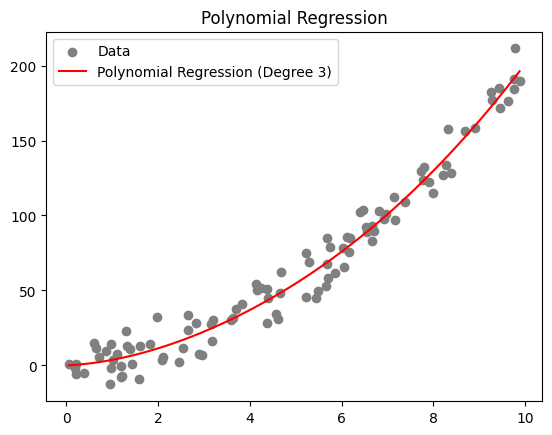

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate non-linear data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 data points, single feature
y = 1 + 2*X**2 + np.random.randn(100, 1) * 10  # quadratic relationship with noise

# Ensure X and y have the same shape
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Fit polynomial regression (degree 3)
model = make_pipeline(PolynomialFeatures(5), LinearRegression())
model.fit(X, y)

# Plot the data and the polynomial regression curve
plt.scatter(X, y, color='gray', label='Data')
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(X_plot, model.predict(X_plot), color='red', label='Polynomial Regression (Degree 3)')
plt.title("Polynomial Regression")
plt.legend()
plt.show()


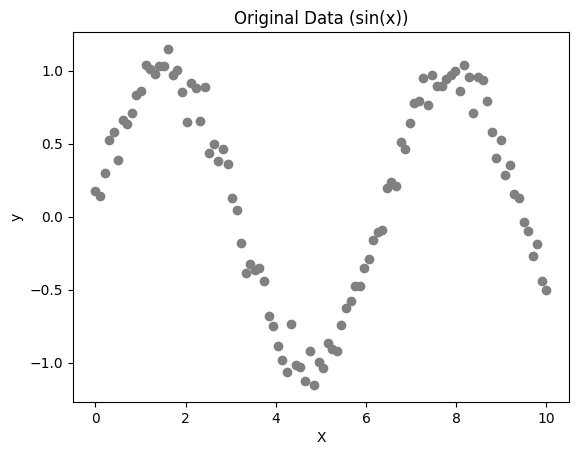

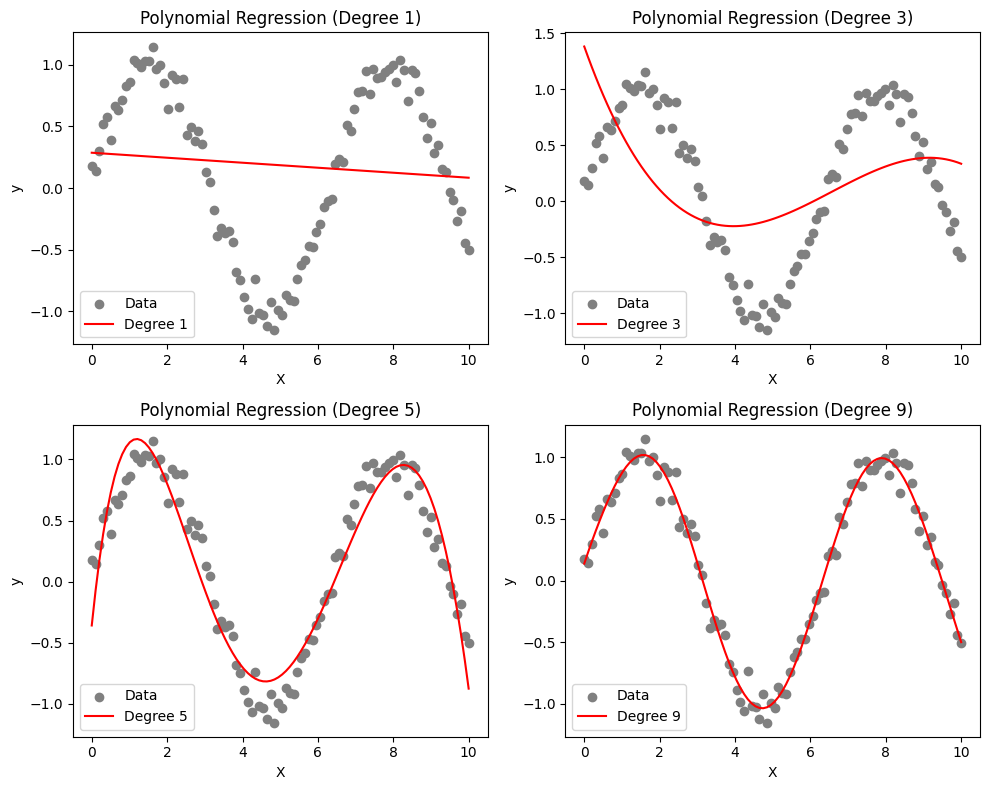

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Generate complex data (sinusoidal relationship)
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 100 data points from 0 to 10
y = np.sin(X).ravel() + np.random.randn(100) * 0.1  # sin function with noise

# Plot original data
plt.scatter(X, y, color='gray', label='Data')
plt.title("Original Data (sin(x))")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Fit polynomial models with different degrees
degrees = [1, 3, 5, 9]  # Degree of polynomial
plt.figure(figsize=(10, 8))

for i, degree in enumerate(degrees, 1):
    # Create polynomial features and fit model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    # Plot the fitted polynomial regression line
    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)

    # Plot
    plt.subplot(2, 2, i)
    plt.scatter(X, y, color='gray', label='Data')
    plt.plot(X_plot, y_plot, label=f"Degree {degree}", color='red')
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.tight_layout()
plt.show()


# Visualizing the Cost Function in Linear Regression

In linear regression, we aim to minimize the error between the predicted values and the actual values. The **cost function** (or **loss function**) measures the amount of error in the predictions. The most common cost function in linear regression is the **Mean Squared Error (MSE)**:

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

Where:
- $\hat{y}^{(i)}$ is the predicted value from the regression model.
- $y^{(i)}$ is the actual target value.
- $m$ is the number of data points (samples).

### **The Goal**

The goal of linear regression is to find the model parameters (intercept $\theta_0$ and slope $\theta_1$) that minimize the cost function. This is done by searching for the values of $\theta_0$ and $\theta_1$ that lead to the smallest possible **MSE**.

In this notebook, we will:
1. Generate simple linear data.
2. Compute the MSE cost function for different values of $\theta_0$ and $\theta_1$.
3. Visualize the cost function as a 3D surface and a 2D contour plot to see how it changes with different values of $\theta_0$ and $\theta_1$.

### **Visualizing the Cost Function**

- The 3D surface plot shows the **MSE** as a function of $\theta_0$ (intercept) and $\theta_1$ (slope).
- The lowest point on the surface represents the optimal values of $\theta_0$ and $\theta

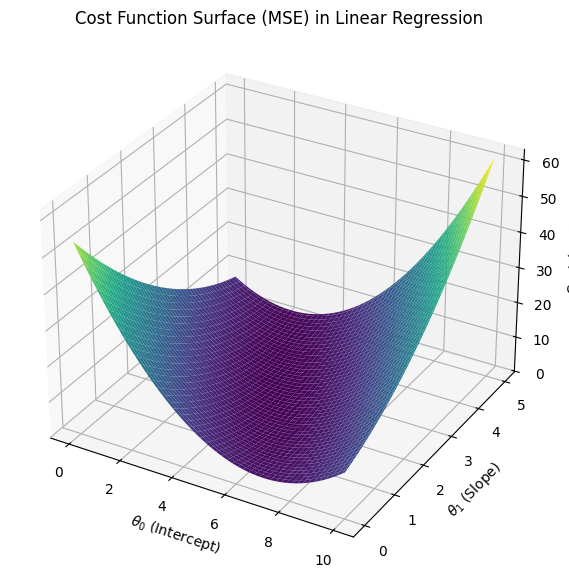

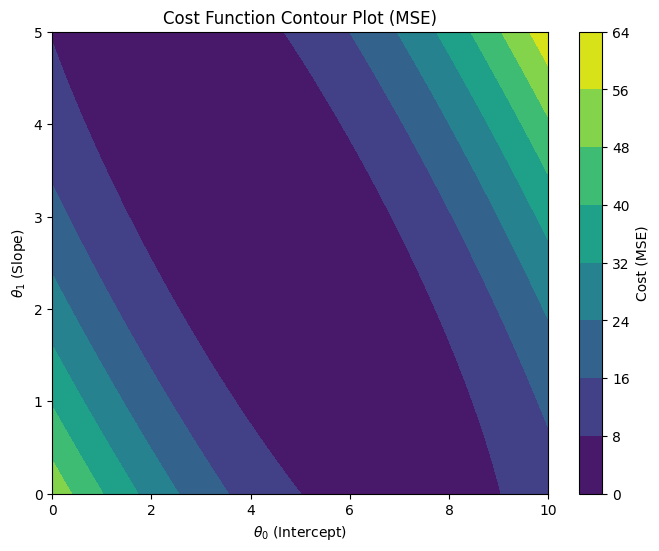

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Generate simple linear data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Set up the cost function: Mean Squared Error (MSE)
def compute_cost(theta0, theta1, X, y):
    predictions = theta0 + theta1 * X
    return mean_squared_error(y, predictions)

# Create a grid of theta0 and theta1 values to visualize the cost function
theta0_vals = np.linspace(0, 10, 100)  # Vary intercept
theta1_vals = np.linspace(0, 5, 100)   # Vary slope

# Initialize the cost matrix
cost_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Calculate cost for every pair of theta0 and theta1
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        cost_vals[i, j] = compute_cost(theta0, theta1, X, y)

# Plotting the cost function surface
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

# Create a 3D plot of the cost function
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_grid, theta1_grid, cost_vals.T, cmap='viridis')
ax.set_xlabel(r'$\theta_0$ (Intercept)')
ax.set_ylabel(r'$\theta_1$ (Slope)')
ax.set_zlabel('Cost (MSE)')
plt.title("Cost Function Surface (MSE) in Linear Regression")
plt.show()

# Optional: 2D contour plot of the cost function
plt.figure(figsize=(8, 6))
plt.contourf(theta0_grid, theta1_grid, cost_vals.T, cmap='viridis')
plt.colorbar(label='Cost (MSE)')
plt.xlabel(r'$\theta_0$ (Intercept)')
plt.ylabel(r'$\theta_1$ (Slope)')
plt.title("Cost Function Contour Plot (MSE)")
plt.show()
